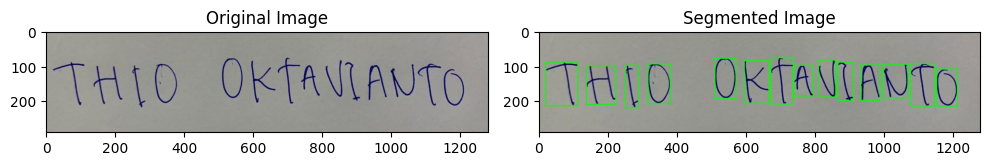

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def highlight_letters(image_path, text):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply binary thresholding to obtain a black and white image
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
    
    # Find contours in the image
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Iterate over each contour
    for contour in contours:
        # Get the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)
        
        # Draw a green rectangle around the contour
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
    # Save the modified image to a temporary file
    temp_image_path = "highlighted_image.jpg"
    cv2.imwrite(temp_image_path, image)
    
    # Display the original image and the segmented image side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Plot the original image without the rectangle
    original_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    axes[0].imshow(original_image)
    axes[0].set_title("Original Image")
    
    # Plot the segmented image
    segmented_image = plt.imread(temp_image_path)
    axes[1].imshow(segmented_image)
    axes[1].set_title("Segmented Image")
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Remove the temporary image file
    os.remove(temp_image_path)

# Example usage
highlight_letters(r"C:\Downloads\thio.jpg", "THIO OKTAVIANTO")
